# Restaurant Review Classification
#### In this project, the aim is to classify reviews of various restaurants as real or fake
#### Dataset Used: Yelp Dataset

## Importing some libraries and Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
import json
import seaborn as sns

LIMIT = 2500000

In [2]:
def load_data(filepath, nrows=None):
    with open(filepath, encoding="utf8") as jsonfile:
        count = 0
        items = []
        line = jsonfile.readline()
        while (nrows is None or count < nrows) and line:
            count += 1
            obj = json.loads(line)
            items.append(obj)
            line = jsonfile.readline()
        return pd.DataFrame(items)
    
business = load_data('../Dataset/yelp_academic_dataset_business.json')
print('Business dataset size = {}'.format(business.shape[0]))

Business dataset size = 160585


In [3]:
reviews = load_data('../Dataset/yelp_academic_dataset_review.json', LIMIT)
print('Review dataset size = {}'.format(reviews.shape[0]))

Review dataset size = 2500000


In [4]:
tips = load_data('../Dataset/yelp_academic_dataset_tip.json')
print('Tip dataset size = {}'.format(tips.shape[0]))

Tip dataset size = 1162119


In [5]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [6]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [7]:
reviews['text'].head()

0    Apparently Prides Osteria had a rough summer a...
1    This store is pretty good. Not as great as Wal...
2    I called WVM on the recommendation of a couple...
3    I've stayed at many Marriott and Renaissance M...
4    The food is always great here. The service fro...
Name: text, dtype: object

## Data Preprocessing and Sentiment Analysis

In [8]:
business.shape

(160585, 14)

In [9]:
business.business_id.nunique()

160585

In [10]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      14992
categories        115
hours           27341
dtype: int64

In [11]:
reviews.shape

(2500000, 9)

In [12]:
reviews.business_id.nunique()

48111

In [13]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

### Conclusions:
- There are businesses with multiple reviews
- No missing data in 'reviews'

In [14]:
# 1. Businesses not in restaurant business are dropped (Keyword "food" not in categories).
# 2. Businesses with missing values are dropped.
# 3. Create a random stratified sample of restaurants with equal weightage to 'stars' column (distinct count = 9)
# 4. Drop columns (address, postal_code, is_open, categories).

def analyse_business(business):
    business.drop(business[~business['categories'].str.lower().str.contains('food',na=False)].index, inplace = True)
    business.dropna(axis=0, how='any', inplace = True)
    business_1 = business.groupby('stars').apply(lambda x: x.sample(n=20))
    business_1.drop(business_1.columns[[2, 5, 10, 12]], axis=1, inplace=True)
    business_1 = business_1.reset_index(drop=True)
    return business_1
business_1 = analyse_business(business)
business_1.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,hours
0,7aGHJdnofG7IsJIn3T6xrA,7-Eleven,Austin,TX,30.416481,-97.748204,1.0,8,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,z8kjh_xNF8RrJ8Lf05LTzQ,McDonald's,Atlanta,GA,33.757734,-84.503428,1.0,12,"{'RestaurantsReservations': 'False', 'Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,eK6_obG2rtINU_ZD-v651A,McDonald's,Decatur,GA,33.710700,-84.216939,1.0,28,"{'RestaurantsReservations': 'False', 'NoiseLev...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,BRK6mymmv0tqQxRRtzYROA,Burger King,Columbus,OH,39.986042,-82.988752,1.0,8,"{'RestaurantsPriceRange2': '1', 'RestaurantsDe...","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'..."
4,UUYx2Az3DWIcqICo9o0nMw,KFC,Clarkston,GA,33.819358,-84.230853,1.0,16,"{'RestaurantsTakeOut': 'True', 'WiFi': ''no'',...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."


In [15]:
# 1. We store all unique business ids in a list
# 2. Review_1 is created using business ids in temp and removing unnecessary columns
# 3. A new dataframe review_2 is created with index resetting

def analyse_review(review, business):
    businessids = business['business_id'].tolist()
    review_1 = review[review['business_id'].isin(businessids)]
    review_1 = review_1[['business_id', 'stars', 'text']]
    review_2 = review_1.reset_index(drop=True)
    return review_2
review_2 = analyse_review(reviews, business_1)
review_2.head(50)

,business_id,stars,text
0,0nMbLN0B5I-2tNnQLSo86w,5.0,"""Even the mad Captain Ahab is touched by Starb..."
1,HaKhksuFqOkKNY2_AZvPuQ,4.0,"After reading the earlier reviews, we conside..."
2,880YPPlGyi_49AXLH8xIeA,4.0,"Ok, ok, I'm probably the only person (for sure..."
3,lnBtjouBKqOUl9Oo0VD5mQ,5.0,Was here about a couple weeks ago when they fi...
4,JYxLnXf29r0IFs5Oo7ERig,3.0,A good place for folks staying at the Hilton w...
5,880YPPlGyi_49AXLH8xIeA,1.0,Went on a Thursday night around 8:30pm. We wer...
6,lnBtjouBKqOUl9Oo0VD5mQ,5.0,Oh wow... such a strong chai latte I love it! ...
7,880YPPlGyi_49AXLH8xIeA,4.0,A decent spot.\n\nI have been coming here on a...
8,lnBtjouBKqOUl9Oo0VD5mQ,4.0,"The bagels are delicious, however the coffee s..."
9,QZxHajqmhifn6Uz6JcUyNg,2.0,We stopped by on a rainy afternoon after 15 ho...


In [16]:
import nltk
import re
from nltk import pos_tag, pos_tag_sents
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize, word_tokenize, pos_tag

In [17]:
# 1. The text data in review dataset is cleaned and tokenized to sentences and then words
# 2. Tag all words with position tags and convert to wordnet tags
# 3. Lemmatize the words and create synsets
# 4. Compute sentiment score (positive score - negative score)
# 5. Return a sentiment polarity score: 1 = positive, 0 = negative

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
 
lemmatizer = WordNetLemmatizer()
  
def convert_tag(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 
def clean_text(text):
    text = text.replace("<br />", " ")
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    #text = text.decode("utf-8")
    return text

def compute_swn_polarity_score(text):
    sentiment_score = 0.0
    num_tokens = 0
    text = clean_text(text)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        tagged_sentence = pos_tag(word_tokenize(sentence))
        for word, tag in tagged_sentence:
            wn_tag = convert_tag(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
            num_tokens += 1
    # sum greater than 0 => positive sentiment
    if sentiment_score >= 0:
        return 1
    # All other scenarios => negative sentiment
    else:
        return 0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [18]:
# Create a new column 'polarity' with sentiment polarity as 1 (positive) or 0 (negative)
review_2['polarity'] = review_2['text'].apply(compute_swn_polarity_score)
review_2.head(50)

,business_id,stars,text,polarity
0,0nMbLN0B5I-2tNnQLSo86w,5.0,"""Even the mad Captain Ahab is touched by Starb...",1
1,HaKhksuFqOkKNY2_AZvPuQ,4.0,"After reading the earlier reviews, we conside...",0
2,880YPPlGyi_49AXLH8xIeA,4.0,"Ok, ok, I'm probably the only person (for sure...",1
3,lnBtjouBKqOUl9Oo0VD5mQ,5.0,Was here about a couple weeks ago when they fi...,1
4,JYxLnXf29r0IFs5Oo7ERig,3.0,A good place for folks staying at the Hilton w...,1
5,880YPPlGyi_49AXLH8xIeA,1.0,Went on a Thursday night around 8:30pm. We wer...,1
6,lnBtjouBKqOUl9Oo0VD5mQ,5.0,Oh wow... such a strong chai latte I love it! ...,1
7,880YPPlGyi_49AXLH8xIeA,4.0,A decent spot.\n\nI have been coming here on a...,1
8,lnBtjouBKqOUl9Oo0VD5mQ,4.0,"The bagels are delicious, however the coffee s...",1
9,QZxHajqmhifn6Uz6JcUyNg,2.0,We stopped by on a rainy afternoon after 15 ho...,0


In [19]:
# 1. Create a new dataframe review_3 by averaging all columns and also find the net positive sentiment score 
# 2. Round up the 'stars' and 'polarity' columns to 2 decimals
# 3. Rename 'polarity' column to 'net_positive_sentiment' and 'stars' to 'review_stars'

def transform_review(review_2):
    review_3 = review_2.groupby('business_id').mean().reset_index()
    review_3['stars'] = review_3['stars'].apply(lambda x: round(x,2))
    review_3['polarity'] = review_3['polarity'].apply(lambda x: round(x,2))
    review_3.rename(columns={'polarity':'net_positive_sentiment_score'}, inplace=True)
    review_3.rename(columns={'stars':'review_stars'}, inplace=True)
    return review_3
review_3 = transform_review(review_2)
review_3.head(50)

,business_id,review_stars,net_positive_sentiment_score
0,0Qo05vr-SIml4clER4zThg,4.77,0.85
1,0nMbLN0B5I-2tNnQLSo86w,3.16,0.47
2,1EdWZWebate-u52mEhb2jw,2.51,0.45
3,3kclO4LgMIUlH7uvoJq1pg,4.48,0.79
4,4EBasZbdtEp5-URmHh0Dag,2.20,0.40
5,54NgB8wtOyLp6t_cV_XSKA,4.07,0.81
6,5l7nJlN5zeeaO-VsyaMdBQ,2.43,0.49
7,880YPPlGyi_49AXLH8xIeA,2.68,0.66
8,APysa0JS0lE3Bo7WQQyGxw,4.23,0.77
9,FeePpFQlqCWcgMKd8a56aQ,1.22,0.22


### Conclusion:
- We can see that higher ratings correspond to higher sentiment score on a scale of 0-1

In [20]:
# 1. Join business_checkin and review_3 dataframes using their business ids
# 2. Fill missing values with 0

def merge_business_checkin_review(review_3, business_1):
    business_checkin_review = pd.merge(business_1, review_3, on='business_id', how='inner')
    business_checkin_review.fillna(0)
    return business_checkin_review

business_checkin_review = merge_business_checkin_review(review_3, business_1)
business_checkin_review.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,hours,review_stars,net_positive_sentiment_score
0,ud69sVrixDW7Z14ipwjuaw,Dunkin',Randolph,MA,42.165774,-71.045111,1.0,11,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.00,0.27
1,GZ1C5Sjp32wPTHB4Y2yPUA,McDonald's,Ellenwood,GA,33.611722,-84.299984,1.0,23,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-1:30', 'Tuesday': '5:0-1:30', ...",1.22,0.17
2,FeePpFQlqCWcgMKd8a56aQ,Starbucks,Burlington,MA,42.472260,-71.210991,1.0,8,"{'BusinessParking': '{'garage': False, 'street...","{'Monday': '5:0-20:30', 'Tuesday': '5:0-20:30'...",1.22,0.22
3,Q8uwPGFgnvZwtpQRcg6ToQ,McDonald's,Cocoa,FL,28.397648,-80.764522,1.0,12,"{'RestaurantsReservations': 'False', 'Business...","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...",1.15,0.23
4,RMSKtVIViSTDERtmoqYacw,McDonald's,Sandy Springs,GA,33.919853,-84.378526,1.0,138,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.17,0.18


### Tip Data Sentiment Analysis

In [21]:
# 1. Just like before we create a unique list of business ids
# 2. Tip_1 is also created keeping relevant columns
# 3. A new dataframe tip_2 is created with index resetting
# 4. We find the sentiment score for the 'text'

def downsize_tip(tips, business_1):
    temp = business_1['business_id'].tolist()
    tip_1 = tips[tips['business_id'].isin(temp)]
    tip_1 = tip_1[['business_id', 'text']]
    tip_2 = tip_1.reset_index(drop=True)
    return tip_2

tip_2 = downsize_tip(tips, business_1)
tip_2.head()

,business_id,text
0,GVJzdSnD4807gx27fOTlmw,"Don't be fooled by the hot dog cart, this plac..."
1,sYhfhua7GWiGLQkIUP_TWQ,Clea is the best bartender ever
2,9R9yC5Z-5CmYOTDRMyFD7A,Holy busy on weekend mornings! Expect 15-30 mi...
3,krelOojaVEWScS5_I7C88Q,"Use ""Vikings"" for first time users for $5 off!"
4,_43Wc6X9d8uWoFU0Iq-bdA,Flamingos mural


In [22]:
tip_2['polarity'] = tip_2['text'].apply(compute_swn_polarity_score)
tip_2.head(50)

,business_id,text,polarity
0,GVJzdSnD4807gx27fOTlmw,"Don't be fooled by the hot dog cart, this plac...",1
1,sYhfhua7GWiGLQkIUP_TWQ,Clea is the best bartender ever,1
2,9R9yC5Z-5CmYOTDRMyFD7A,Holy busy on weekend mornings! Expect 15-30 mi...,1
3,krelOojaVEWScS5_I7C88Q,"Use ""Vikings"" for first time users for $5 off!",1
4,_43Wc6X9d8uWoFU0Iq-bdA,Flamingos mural,1
5,JDdV8idlUOgXLVoPRZAZoA,The crew here is the salt of the earth,1
6,YFud540A5RLLg2OT-5x38A,Bahama Breeze is serving Tofu! The new Vegetar...,1
7,Trp25IftRyYvcvUQlBOJ4Q,Donuts for the boy and they have great breakfa...,1
8,HaKhksuFqOkKNY2_AZvPuQ,"This location is great, though they can work o...",1
9,f2ygTekNNG6lDHJ3oU5_jQ,Free Slurpee Day!,1


In [23]:
# 1. Create a new dataframe tip3 by averaging all columns to give 99 distinct rows of business ids 
# 2. Reset index
# 3. Round up the 'polarity' columns to 2 decimals
# 4. Rename 'polarity' column to 'net_positive_sentiment'

def transform_tip(tip_2):
    tip_3 = tip_2.groupby('business_id').mean().reset_index()
    tip_3['polarity'] = tip_3['polarity'].apply(lambda x: round(x,2))
    tip_3.rename(columns={'polarity':'net_positive_sentiment_score'}, inplace=True)
    return tip_3

tip_3 = transform_tip(tip_2)
tip_3.head(50)

,business_id,net_positive_sentiment_score
0,-pTd9hm1s-KzDHSMIYPDuQ,0.25
1,-sBWSqSxp8Y1lvW3wTEnJg,0.40
2,0NMsTdG1GAM-m_leCkVFow,1.00
3,0Qo05vr-SIml4clER4zThg,1.00
4,0nMbLN0B5I-2tNnQLSo86w,0.80
5,0nReZg8VID_52qiAHGF58w,1.00
6,1EdWZWebate-u52mEhb2jw,0.85
7,1R1ES_XhhfgIAqs_UigvXQ,0.43
8,2DNYWiFBGgyijzlQiufVbQ,0.75
9,2lfJnS98uTMvp6QBnHQo9Q,1.00


In [24]:
# 1. Join business_checkin_review and tip3 dataframes using the business ids
# 2. Fill missing values with 0

def merge_business_checkin_review_tip(tip_3, business_checkin_review):
    business_checkin_review_tip = pd.merge(business_checkin_review, tip_3, on='business_id', how='left')
    business_checkin_review_tip.rename(columns={'net_positive_sentiment_score_x':
                                                'net_positive_sentiment_score_review'}, inplace=True)
    business_checkin_review_tip.rename(columns={'net_positive_sentiment_score_y':
                                                'net_positive_sentiment_score_tip'}, inplace=True)
    return business_checkin_review_tip

business_checkin_review_tip = merge_business_checkin_review_tip(tip_3, business_checkin_review)
business_checkin_review_tip.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,hours,review_stars,net_positive_sentiment_score_review,net_positive_sentiment_score_tip
0,ud69sVrixDW7Z14ipwjuaw,Dunkin',Randolph,MA,42.165774,-71.045111,1.0,11,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.00,0.27,0.50
1,GZ1C5Sjp32wPTHB4Y2yPUA,McDonald's,Ellenwood,GA,33.611722,-84.299984,1.0,23,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-1:30', 'Tuesday': '5:0-1:30', ...",1.22,0.17,1.00
2,FeePpFQlqCWcgMKd8a56aQ,Starbucks,Burlington,MA,42.472260,-71.210991,1.0,8,"{'BusinessParking': '{'garage': False, 'street...","{'Monday': '5:0-20:30', 'Tuesday': '5:0-20:30'...",1.22,0.22,NaN
3,Q8uwPGFgnvZwtpQRcg6ToQ,McDonald's,Cocoa,FL,28.397648,-80.764522,1.0,12,"{'RestaurantsReservations': 'False', 'Business...","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...",1.15,0.23,0.75
4,RMSKtVIViSTDERtmoqYacw,McDonald's,Sandy Springs,GA,33.919853,-84.378526,1.0,138,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.17,0.18,0.69


In [25]:
data = business_checkin_review_tip
data = data.dropna()
len(data)

39

In [26]:
data.head(50)

,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,hours,review_stars,net_positive_sentiment_score_review,net_positive_sentiment_score_tip
0,ud69sVrixDW7Z14ipwjuaw,Dunkin',Randolph,MA,42.165774,-71.045111,1.0,11,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.00,0.27,0.50
1,GZ1C5Sjp32wPTHB4Y2yPUA,McDonald's,Ellenwood,GA,33.611722,-84.299984,1.0,23,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-1:30', 'Tuesday': '5:0-1:30', ...",1.22,0.17,1.00
3,Q8uwPGFgnvZwtpQRcg6ToQ,McDonald's,Cocoa,FL,28.397648,-80.764522,1.0,12,"{'RestaurantsReservations': 'False', 'Business...","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...",1.15,0.23,0.75
4,RMSKtVIViSTDERtmoqYacw,McDonald's,Sandy Springs,GA,33.919853,-84.378526,1.0,138,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.17,0.18,0.69
5,TJfiSFs16zQBsSWRlRHHCA,Walgreens,Portland,OR,45.555192,-122.835238,1.5,32,"{'BikeParking': 'True', 'Caters': 'False', 'Bu...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1.52,0.21,0.80
7,sG4TJuNxoXUImqexGn2f4A,Subway,Canal Winchester,OH,39.854613,-82.830103,1.5,8,"{'RestaurantsPriceRange2': '1', 'GoodForKids':...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",1.62,0.38,0.50
8,a-2HuVxMpeF00qhyU1txzQ,KFC,Kissimmee,FL,28.344481,-81.364673,1.5,13,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...",1.64,0.00,0.67
9,ua7y8bQQn0Wqkshb98toKw,Jack in the Box,Austin,TX,30.387890,-97.647477,1.5,41,"{'BikeParking': 'True', 'GoodForKids': 'True',...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1.61,0.18,0.62
10,ST0g9dnL4C_ew0XLdBYNXg,Sonic Drive-In,Austin,TX,30.439053,-97.670909,1.5,52,"{'BikeParking': 'True', 'Ambience': '{'romanti...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-23:0', '...",1.43,0.33,0.62
13,uMPGs_Jc1fBoxeGrCKqRiw,Panda Express,Portland,OR,45.533263,-122.537338,2.0,27,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","{'Monday': '10:0-22:30', 'Tuesday': '10:0-22:3...",1.78,0.44,1.00


## Exploratory Data Analysis (EDA)

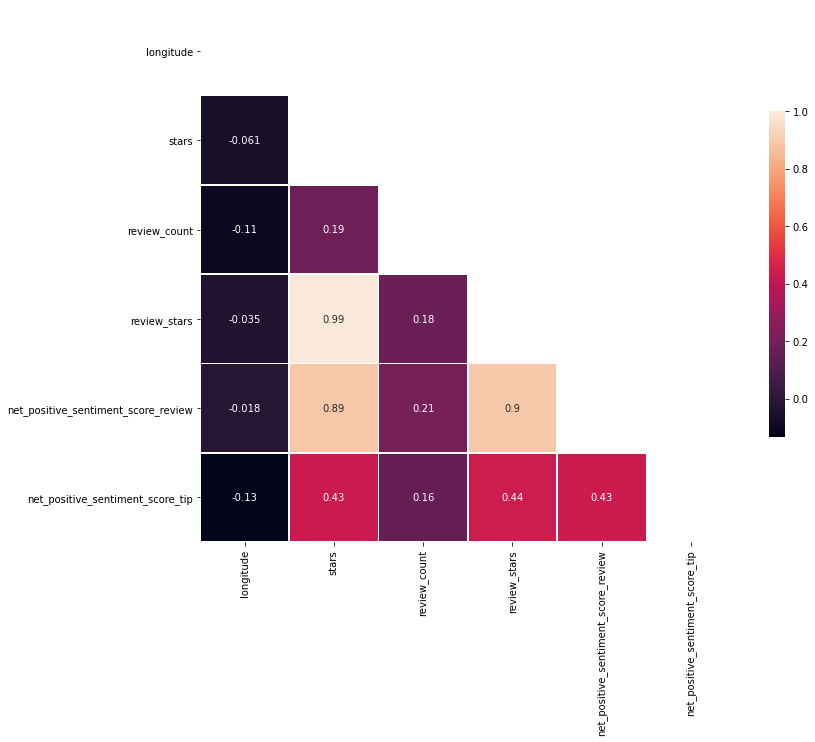

In [27]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, vmax=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Observations:
- There is a high positive correlation between net_positive_sentient_score_review and review_stars and stars. We can use this stat to classify reviews as true or false i.e. higher stars imply higher sentiment score.
- The correlation between net_positive_tip_review and review_stars and stars is not that high.

In [28]:
# From the EDA, we can say that reviews > 2.5 and sentiment score >= 0.5 or reviews <= 2.5 and 
# sentiment score < 0.5 correspond to true reviews and the others false.

def classify_reviews(data):
    if data['review_stars'] > 2.5 and data['net_positive_sentiment_score_review'] > 0.5:
        return True
    elif data['review_stars'] > 2.5 and data['net_positive_sentiment_score_review'] <= 0.5:
        return False
    elif data['review_stars'] <= 2.5 and data['net_positive_sentiment_score_review'] > 0.5:
        return False
    else:
        return True

data['review_check'] = data.apply(classify_reviews, axis=1)
data.head()

<ipython-input-28-36134d07cc6c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_check'] = data.apply(classify_reviews, axis=1)


,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,hours,review_stars,net_positive_sentiment_score_review,net_positive_sentiment_score_tip,review_check
0,ud69sVrixDW7Z14ipwjuaw,Dunkin',Randolph,MA,42.165774,-71.045111,1.0,11,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.00,0.27,0.50,True
1,GZ1C5Sjp32wPTHB4Y2yPUA,McDonald's,Ellenwood,GA,33.611722,-84.299984,1.0,23,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-1:30', 'Tuesday': '5:0-1:30', ...",1.22,0.17,1.00,True
3,Q8uwPGFgnvZwtpQRcg6ToQ,McDonald's,Cocoa,FL,28.397648,-80.764522,1.0,12,"{'RestaurantsReservations': 'False', 'Business...","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...",1.15,0.23,0.75,True
4,RMSKtVIViSTDERtmoqYacw,McDonald's,Sandy Springs,GA,33.919853,-84.378526,1.0,138,"{'RestaurantsReservations': 'False', 'Ambience...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ...",1.17,0.18,0.69,True
5,TJfiSFs16zQBsSWRlRHHCA,Walgreens,Portland,OR,45.555192,-122.835238,1.5,32,"{'BikeParking': 'True', 'Caters': 'False', 'Bu...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1.52,0.21,0.80,True


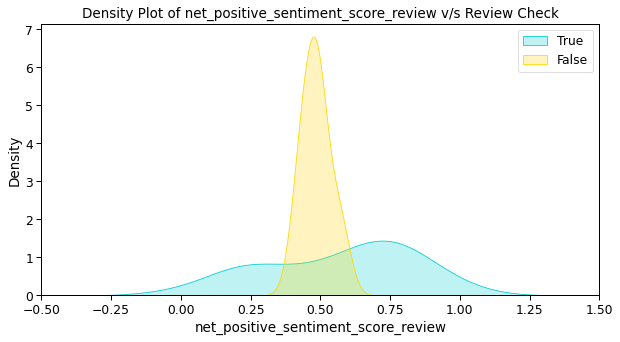

In [30]:
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale=1.4)
sns.kdeplot(data["net_positive_sentiment_score_review"][data.review_check == True], 
            color="darkturquoise", shade=True)
sns.kdeplot(data["net_positive_sentiment_score_review"][data.review_check == False], 
            color="gold", shade=True)

plt.xlim(-0.5,1.5)
plt.legend(['True', 'False'])
plt.title('Density Plot of net_positive_sentiment_score_review v/s Review Check')
plt.show()

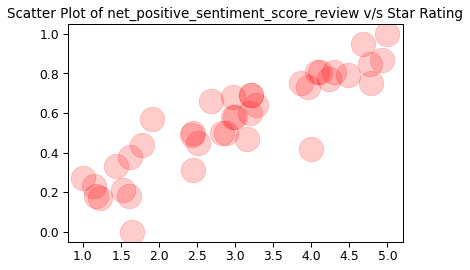

In [31]:
plt.title('Scatter Plot of net_positive_sentiment_score_review v/s Star Rating')
sns.set_context("paper", font_scale=1.4)
plt.scatter(data['review_stars'], data['net_positive_sentiment_score_review'], s=600, c="red", alpha=0.2)

The plot shows a linear relation between net_positive_sentiment_score_review and star rating as was found earlier by EDA.

## Final Dataset and predictions using Machine Learning

##

In [32]:
final_data = data[['business_id','net_positive_sentiment_score_review', 'stars', 'review_stars', 'review_check']]
final_data.head()

,business_id,net_positive_sentiment_score_review,stars,review_stars,review_check
0,ud69sVrixDW7Z14ipwjuaw,0.27,1.0,1.00,True
1,GZ1C5Sjp32wPTHB4Y2yPUA,0.17,1.0,1.22,True
3,Q8uwPGFgnvZwtpQRcg6ToQ,0.23,1.0,1.15,True
4,RMSKtVIViSTDERtmoqYacw,0.18,1.0,1.17,True
5,TJfiSFs16zQBsSWRlRHHCA,0.21,1.5,1.52,True


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [62]:
X = final_data[['net_positive_sentiment_score_review', 'stars', 'review_stars']]
y = final_data[['review_check']].values.ravel()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classifiers = []
accuracies = []

### 1. Support Vector Machine Model

In [63]:
clf = svm.SVC(kernel = 'rbf', C = 100) 
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
classifiers.append('SVC Classifier')
accuracies.append(accuracy)
print(round(accuracy, 2))

0.83


### 2. Logistic Regression

In [64]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('LogisticRegression')
accuracies.append(accuracy)
print(round(accuracy, 2))

0.83


### 3. Decision Tree Classifier

In [65]:
clf = tree.DecisionTreeClassifier(max_depth = 5) 
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
classifiers.append('DecisionTreeClassifier')
accuracies.append(accuracy)
print(round(accuracy, 2))

0.92


### 4. Naive Bayes Model

In [66]:
clf = GaussianNB() 
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
classifiers.append('GaussianNB')
accuracies.append(accuracy)
print(round(accuracy, 2))

0.92


### Model accuracy comparision

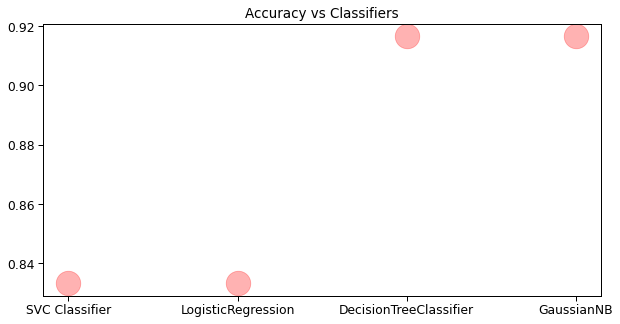

In [67]:
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale=1.4)
plt.scatter(classifiers, accuracies, s=600, c="red", alpha=0.3)
plt.title('Accuracy vs Classifiers')
plt.show()

### Results:
- The Decision Tree Classifier and GaussianNB gave the best performance with 92% accuracy.
- Support Vector and Logistic Regression gave an accuracy of 83%.